# Test Overlap between sources in a blend

In [1]:
# Import Packages and setup
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
from lsst.utils import getPackageDir
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import proximal, display, sim, baseline
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)
plogger = logging.getLogger("proxmin")
plogger.setLevel(logging.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 6
INFO:lsst.meas.deblender.proximal:Unblended sources: 2
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 4
INFO:lsst.meas.deblender.proximal:Parent id: 1
/Users/fred/projects/proxmin/proxmin/proximal.py:60: RuntimeWarning: invalid value encountered in true_divide
  return X / np.sum(X, axis=axis, keepdims=True)
INFO:proxmin.algorithms:Completed 421 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 13.21 s
INFO:lsst.meas.deblender.proximal:Parent id: 3
INFO:proxmin.algorithms:Completed 554 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 1.35 s
INFO:lsst.meas.deblender.proximal:Parent id: 5
INFO:proxmin.algorithms:Completed 313 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 1.70 s
INFO:lsst.meas.deblender.proximal:Parent id: 6
INFO:proxmin.algorithms:Completed 2000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 638.31 s
INFO:lsst.meas.deblender.proximal:Parent id: 8
INFO:proxmi

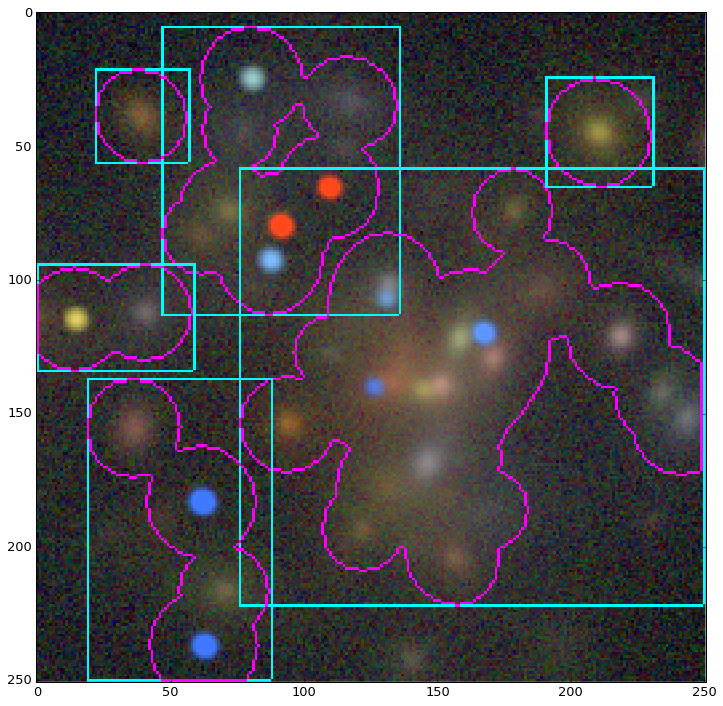

In [2]:
# Load the data
dataPath = os.path.abspath(os.path.join(lsst.utils.getPackageDir("testdata_deblender"), 'sim_data'))
filters = ["u", "g", "r", "i", "z", 'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename, useExactPeaks=True)
expDb.deblend(
    display=False,
    maxiter=2000,
    strict_constraints="M",
    constraints="S",
    usePsf=False,
    e_rel=1e-2,
    monotonicUseNearest=True,
    algorithm="GLMM",
    deblendName="new",
    compare=False,
    l0_thresh=.35,
    max_children=None
)
import pickle
#expDb.calexps = []
expDb.simCat = simFilename
expDb.simTable = None
pickle.dump(expDb, open("/Users/fred/temp/expDb2.p", "wb"))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
display.plotColorImage(calexps=expDb.calexps, figsize=(12,12), ax=ax, show=False)
for pid, parentDeblend in expDb.deblends["new"].items():
    fp = parentDeblend.footprint
    
    bbox = fp.getBBox()
    xmin = bbox.getMinX()
    ymin = bbox.getMinY()
    xmax = bbox.getMaxX()
    ymax = bbox.getMaxY()
    border = np.zeros((251,251))
    border[ymin,xmin:xmax] = 1
    border[ymin:ymax,xmin] = 1
    border[ymax,xmin:xmax] = 1
    border[ymin:ymax,xmax] = 1
    border = np.ma.array(border, mask=border==0)
    ax.imshow(border, cmap="cool")
    
    border, filled = debUtils.getFootprintArray(fp, expDb.calexps[0].getBBox())
    ax.imshow(border, cmap="cool_r")